In [1]:
from  google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Deteccion de Formas**

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [49]:
rformas ='/content/drive/MyDrive/input71.jpg'
rboomerang='/content/drive/MyDrive/input72.jpg'

In [38]:
#
def get_all_contours(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 127, 255, 0)
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    return contours

In [39]:
#
def get_ref_contour(img):
    contours = get_all_contours(img)
    for contour in contours:
        area = cv2.contourArea(contour)
        img_area = img.shape[0] * img.shape[1]
        if 0.05 < area / float(img_area) < 0.8:
            return contour

In [40]:
if __name__=='__main__':
  img1=cv2.imread(rboomerang)
  img2=cv2.imread(rformas)
  ref_contour=get_ref_contour(img1)
  input_contours=get_all_contours(img2)
  closest_contour=None
  min_dist=None
  contour_img=img2.copy()
  cv2.drawContours(contour_img, input_contours,-1,color=(255,255,255),thickness=3)


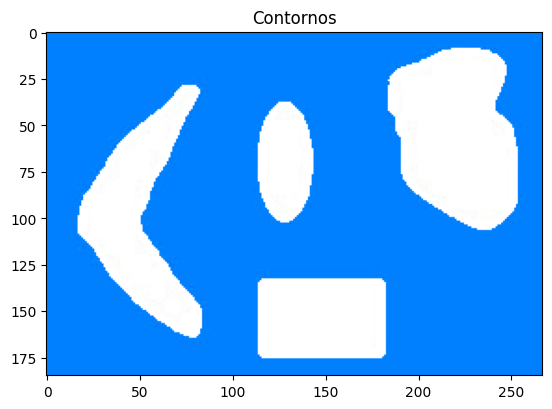

Contorno 0 coincide en 0.6681712140187628
Contorno 1 coincide en 0.49608227581126324
Contorno 2 coincide en 1.813248129769771
Contorno 3 coincide en 0.777538443852954


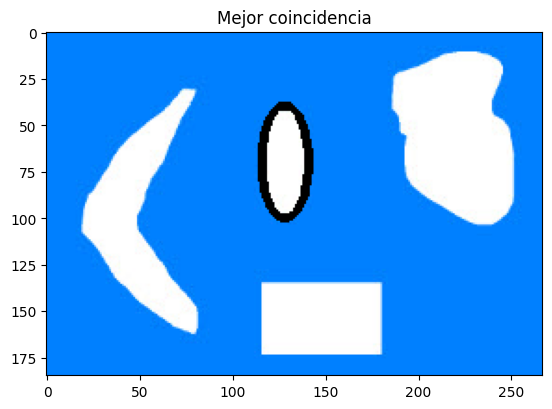

In [42]:
img_cvt = cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB)
plt.title("Contornos")
plt.imshow(img_cvt)
plt.show()

i = 0
for contour in input_contours:
  ret = cv2.matchShapes(ref_contour, contour, 3, 0.0)
  print("Contorno {} coincide en {}".format(i, ret))
  i += 1

  if min_dist is None or ret < min_dist:
    min_dist = ret
    closest_contour = contour
cv2.drawContours(img2,[closest_contour],0,color=(0,0,0),thickness=3)
img_cvt=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.title('Mejor coincidencia')
plt.imshow(img_cvt)
plt.show()

In [43]:
import sys
import cv2
import numpy as np

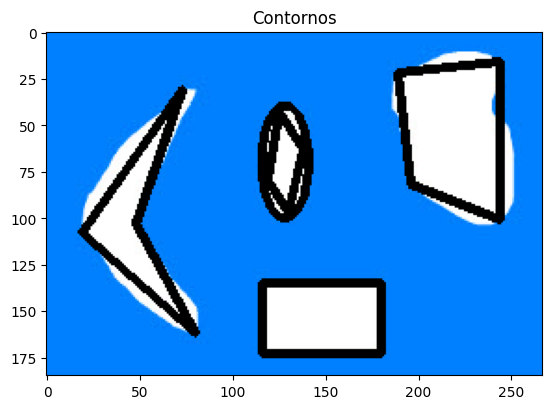

In [46]:
if __name__ == '__main__':
    img1 = cv2.imread('forma.png')
    input_contours = get_all_contours(img2)
    contour_img = img2.copy()
    smoothed_contours = []
    factor = 0.05  # 0.05, 0.01, 0.00001
    for contour in input_contours:
        epsilon = factor * cv2.arcLength(contour, True)
        smoothed_contours.append(cv2.approxPolyDP(contour, epsilon, True))
    cv2.drawContours(contour_img, smoothed_contours, -1, color=(0, 0, 0), thickness=3)
    img_cvt = cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB)
    plt.title('Contornos')
    plt.imshow(img_cvt)
    plt.show()

In [47]:
import sys
import cv2
import numpy as np

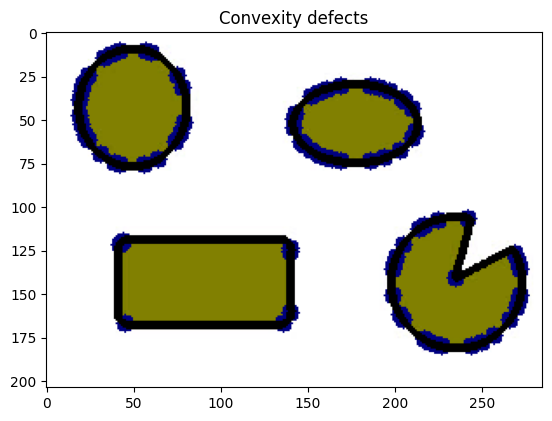

In [50]:
if __name__ == '__main__':
    img = cv2.imread('/content/drive/MyDrive/input72.jpg')
    for contour in get_all_contours(img):
        hull = cv2.convexHull(contour, returnPoints=False)
        defects = cv2.convexityDefects(contour, hull)
        if defects is None:
            continue
        for i in range(defects.shape[0]):
            start_defect, end_defect, far_defect, _ = defects[i, 0]
            start = tuple(contour[start_defect][0])
            end = tuple(contour[end_defect][0])
            far = tuple(contour[far_defect][0])
            cv2.circle(img, far, 5, [128, 0, 0], -1)
        cv2.drawContours(img, [contour], -1, (0, 0, 0), 3)
    img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.title('Convexity defects')
    plt.imshow(img_cvt)
    plt.show()

In [57]:
import sys
import cv2
import numpy as np


In [60]:
rfconvexas='/content/drive/MyDrive/input73.jpg'

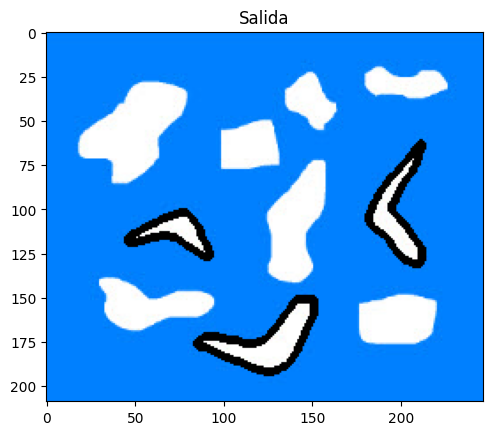

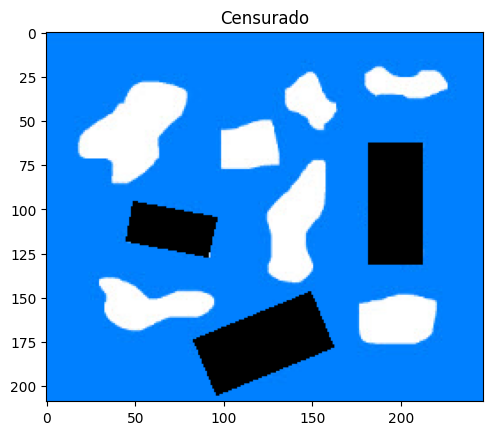

In [61]:
if __name__ == '__main__':
    img = cv2.imread(rfconvexas)
    img_orig = np.copy(img)
    input_contours = get_all_contours(img)
    solidity_values = []
    for contour in input_contours:
        area_contour = cv2.contourArea(contour)
        convex_hull = cv2.convexHull(contour)
        area_hull = cv2.contourArea(convex_hull)
        solidity = float(area_contour) / area_hull
        solidity_values.append(solidity)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    solidity_values = np.array(solidity_values).reshape((len(solidity_values), 1)).astype('float32')
    compactness, labels, centers = cv2.kmeans(solidity_values, 2, None, criteria, 10, flags)
    closest_class = np.argmin(centers)
    output_contours = []
    for i in np.where(labels == closest_class)[0]:
        index = np.where(solidity_values == solidity_values[i])[0][0]
        output_contours.append(input_contours[index])
    cv2.drawContours(img, output_contours, -1, (0, 0, 0), 3)
    img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.title('Salida')
    plt.imshow(img_cvt)
    plt.show()
    for contour in output_contours:
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(img_orig, [box], 0, (0, 0, 0), -1)
    img_cvt = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
    plt.title('Censurado')
    plt.imshow(img_cvt)
    plt.show()

**RECORTAR**

In [62]:
import cv2
import matplotlib.pyplot as plt

In [63]:
rcortar='/content/drive/MyDrive/input74.jpg'

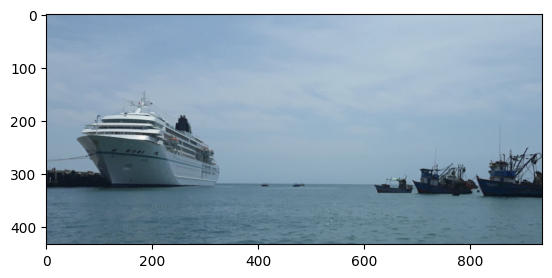

In [65]:
img = cv2.imread(rcortar)
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt, cmap="gray")
plt.show()



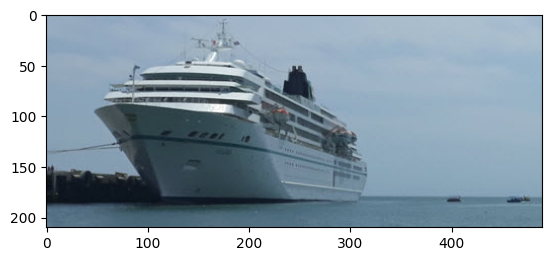

In [66]:
zona = img_cvt[140:350, 10:500]  # [desdeY:hastaY, desdeX:hastaX]
plt.imshow(zona, cmap="gray")
plt.show()
